## INTRODUCTION
This dataset comprises 204 entries and 38 attributes, providing a comprehensive analysis of key economic and social indicators across various countries. It includes a diverse range of metrics, allowing for in-depth exploration of global trends related to GDP, education, health, and environmental factors.

### KEY FEATURES

**GDP**: Gross Domestic Product (in current US dollars), representing the total economic output of a country.<br>
**Sex Ratio**: The ratio of males to females in the population, highlighting demographic trends.<br>
**Life Expectancy**: Average lifespan for males and females, an essential indicator of healthcare quality.<br>
**Education Enrollment Rates**: Data on primary, secondary, and post-secondary education enrollment for males and females, reflecting educational attainment.<br>
**Unemployment Rate**: Percentage of the labor force that is unemployed, indicating economic health.<br>
**Homicide Rate**: Number of homicides per 100,000 population, providing insight into safety and crime levels.<br>
**Urban Population Growth**: Rate of growth in urban populations, illustrating migration trends.<br>
**CO2 Emissions**: Carbon dioxide emissions per capita, an important measure of environmental impact.<br>
**Forested Area**: Percentage of land covered by forests, indicating biodiversity and environmental health.<br>
**Tourist Numbers**: Total number of international visitors, which can reflect a country's tourism potential.

In [1]:
# import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('country_data.csv')

In [3]:
data.shape

(204, 38)

In [4]:
data.head()

,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,currency,iso2,employment_services,...,pop_growth,region,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,15059.0,103.7,28748.0,76.7,12.8,5908.0,2.3,"{'code': 'ALL', 'name': 'Lek'}",AL,43.7,...,-0.1,Southern Europe,105.0,71.8,5223.8,1.6,4.3,105.2,4.3,5340.0
2,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
3,3238.0,102.3,468.0,NaN,NaN,1538.0,0.0,"{'code': 'EUR', 'name': 'Euro'}",AD,NaN,...,-0.2,Southern Europe,164.2,91.6,42051.6,1.2,NaN,NaN,NaN,3042.0
4,105902.0,97.9,1246700.0,57.8,6.8,21340.0,4.8,"{'code': 'AOA', 'name': 'Kwanza'}",AO,41.7,...,3.3,Middle Africa,26.4,14.3,3437.3,5.6,70.1,121.1,18.0,218.0


In [5]:
# There seem to be a few number of missing values in almost all the columns. Needs a better understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gdp                                 203 non-null    float64
 1   sex_ratio                           204 non-null    float64
 2   surface_area                        203 non-null    float64
 3   life_expectancy_male                198 non-null    float64
 4   unemployment                        194 non-null    float64
 5   imports                             199 non-null    float64
 6   homicide_rate                       181 non-null    float64
 7   currency                            204 non-null    object 
 8   iso2                                203 non-null    object 
 9   employment_services                 193 non-null    float64
 10  employment_industry                 193 non-null    float64
 11  urban_population_growth             204 non-n

In [6]:
# Finding missing data count/percenatge of missing values
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['Count', 'Percentage']
missing.sort_values(by='Count', ascending = False)

,Count,Percentage
co2_emissions,59,28.921569
post_secondary_enrollment_male,33,16.176471
post_secondary_enrollment_female,33,16.176471
homicide_rate,23,11.274510
refugees,14,6.862745
secondary_school_enrollment_male,14,6.862745
secondary_school_enrollment_female,14,6.862745
employment_industry,11,5.392157
employment_agriculture,11,5.392157
employment_services,11,5.392157


In [7]:
# I would like to reshuffle some columns. Bringing the country code, captial and region to the left most side
# Just for the visual ease

new_column_order = ['iso2','name','capital','region','currency','gdp','gdp_per_capita','gdp_growth','life_expectancy_female',
                    'life_expectancy_male','fertility','infant_mortality','sex_ratio', 'population','pop_growth', 
                    'pop_density','urban_population','urban_population_growth','imports','exports','unemployment',
                    'employment_industry','employment_agriculture','employment_services','tourists','surface_area',
                    'forested_area','internet_users','homicide_rate','refugees','threatened_species','primary_school_enrollment_female',
                    'primary_school_enrollment_male','secondary_school_enrollment_female','secondary_school_enrollment_male', 
                    'post_secondary_enrollment_female', 'post_secondary_enrollment_male','co2_emissions']
data = data[new_column_order]

In [8]:
# My assumption here is that the rows with just 1 value missing might be a single row. So let us check that.
# Partially right, Row 198 has 'gdp_per_capita', 'gdp', 'gdp_growth' missing. Additionally it has more features missing as well.
# 131: ios2 missing
# 175: Surface area missing, but rest are important.
# 198: 

data[data[['iso2','gdp_per_capita', 'gdp', 'gdp_growth', 'surface_area' ]].isnull().any(axis = 1)]

,iso2,name,capital,region,currency,gdp,gdp_per_capita,gdp_growth,life_expectancy_female,life_expectancy_male,...,homicide_rate,refugees,threatened_species,primary_school_enrollment_female,primary_school_enrollment_male,secondary_school_enrollment_female,secondary_school_enrollment_male,post_secondary_enrollment_female,post_secondary_enrollment_male,co2_emissions
131,NaN,Namibia,Windhoek,Southern Africa,"{'code': 'NAD', 'name': 'Namibia Dollar'}",14519.0,5930.1,-0.1,65.8,60.0,...,17.7,4.3,117.0,122.1,126.4,70.0,61.5,30.3,15.3,4.0
175,SD,Sudan,Khartoum,Northern Africa,"{'code': 'SDG', 'name': 'Sudanese Pound'}",50515.0,1208.4,-2.3,66.8,63.1,...,5.1,2974.1,158.0,74.4,79.2,47.0,46.3,17.1,16.8,18.8
198,VA,Holy See (Vatican City State),Vatican City,Southern Europe,"{'code': 'EUR', 'name': 'Euro'}",NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Looking at row 198 in complete as it seems most of the columns are missing, so that whether to drop this rpw
# can be decided. Looks like we can drop it.

data.iloc[198,:]

iso2                                                               VA
name                                    Holy See (Vatican City State)
capital                                                  Vatican City
region                                                Southern Europe
currency                              {'code': 'EUR', 'name': 'Euro'}
gdp                                                               NaN
gdp_per_capita                                                    NaN
gdp_growth                                                        NaN
life_expectancy_female                                            NaN
life_expectancy_male                                              NaN
fertility                                                         NaN
infant_mortality                                                  NaN
sex_ratio                                                       219.2
population                                                        1.0
pop_growth          

In [10]:
# looking closely at the regions
data['region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Oceania', 'Western Europe', 'Eastern Europe', 'Central America',
       'Western Africa', 'Southern Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Northern America', 'Eastern Asia',
       'Northern Europe', 'Melanesia', 'Central Asia', 'Micronesia',
       'Polynesia'], dtype=object)

In [11]:
# Looking at the contry code, name and capital, we can keep just one (name in my opinion) as the other info is 
# redundunt
print(len(data['region'].unique()))
print(len(data['iso2'].unique()))
print(len(data['name'].unique()))
print(len(data['capital'].unique()))

22
192
192
192


In [12]:
# Seeing that the regions are repeated, iso2 codes might be too, code to find the rows with same iso2 code:
group_iso = data.groupby('iso2').filter(lambda x: len(x)>1)
group_iso

,iso2,name,capital,region,currency,gdp,gdp_per_capita,gdp_growth,life_expectancy_female,life_expectancy_male,...,homicide_rate,refugees,threatened_species,primary_school_enrollment_female,primary_school_enrollment_male,secondary_school_enrollment_female,secondary_school_enrollment_male,post_secondary_enrollment_female,post_secondary_enrollment_male,co2_emissions
0,AF,Afghanistan,Kabul,Southern Asia,"{'code': 'AFN', 'name': 'Afghani'}",20514.0,551.9,-1.7,65.8,62.8,...,6.7,2826.4,40.0,82.9,124.2,40.0,70.1,4.9,14.2,NaN
1,AL,Albania,Tirana,Southern Europe,"{'code': 'ALL', 'name': 'Lek'}",15059.0,5223.8,4.1,80.1,76.7,...,2.3,4.3,142.0,109.1,105.2,95.7,95.2,67.6,43.0,4.3
2,DZ,Algeria,Algiers,Northern Africa,"{'code': 'DZD', 'name': 'Algerian Dinar'}",173757.0,4114.7,1.4,77.8,75.4,...,1.4,99.5,155.0,107.3,112.4,101.5,97.8,64.4,38.8,130.5
3,AD,Andorra,Andorra La Vella,Southern Europe,"{'code': 'EUR', 'name': 'Euro'}",3238.0,42051.6,1.6,NaN,NaN,...,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AO,Angola,Luanda,Middle Africa,"{'code': 'AOA', 'name': 'Kwanza'}",105902.0,3437.3,-1.2,63.4,57.8,...,4.8,70.1,171.0,105.9,121.1,39.7,61.8,8.5,10.2,18.0
5,AG,Antigua And Barbuda,Saint John's,Caribbean,"{'code': 'XCD', 'name': 'E. Caribbean Dollar'}",1611.0,16727.0,7.4,77.9,75.7,...,11.1,0.2,61.0,104.6,105.4,109.1,113.3,34.3,15.3,NaN
6,AR,Argentina,Buenos Aires,South America,"{'code': 'ARS', 'name': 'Argentine Peso'}",518475.0,11687.6,-2.5,79.8,73.0,...,5.3,165.6,285.0,109.6,109.9,111.0,106.5,112.8,67.8,183.4
7,AM,Armenia,Yerevan,Western Asia,"{'code': 'AMD', 'name': 'Armenian Dram'}",12433.0,4212.1,5.2,78.3,71.1,...,1.7,19.0,119.0,92.7,92.7,84.8,81.7,62.6,47.1,5.2
8,AU,Australia,Canberra,Oceania,"{'code': 'AUD', 'name': 'Australian Dollar'}",1453871.0,58392.7,2.0,85.2,81.2,...,0.9,129.2,1308.0,100.3,100.3,141.2,159.0,133.3,93.8,384.6
9,AT,Austria,Vienna,Western Europe,"{'code': 'EUR', 'name': 'Euro'}",455508.0,51230.3,2.4,83.8,78.9,...,1.0,163.7,185.0,103.0,103.2,98.3,102.5,92.5,78.1,64.9


In [13]:
# sorting it so that same iso2s are together:
# turns out based on iso2, 12 rows are complete duplicates of other rows. Therefore need to be dropped.

sort_iso = group_iso.sort_values(by = 'iso2')
sort_iso

,iso2,name,capital,region,currency,gdp,gdp_per_capita,gdp_growth,life_expectancy_female,life_expectancy_male,...,homicide_rate,refugees,threatened_species,primary_school_enrollment_female,primary_school_enrollment_male,secondary_school_enrollment_female,secondary_school_enrollment_male,post_secondary_enrollment_female,post_secondary_enrollment_male,co2_emissions
13,AD,Andorra,Andorra La Vella,Southern Europe,"{'code': 'EUR', 'name': 'Euro'}",3238.0,42051.6,1.6,NaN,NaN,...,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,Andorra,Andorra La Vella,Southern Europe,"{'code': 'EUR', 'name': 'Euro'}",3238.0,42051.6,1.6,NaN,NaN,...,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AF,Afghanistan,Kabul,Southern Asia,"{'code': 'AFN', 'name': 'Afghani'}",20514.0,551.9,-1.7,65.8,62.8,...,6.7,2826.4,40.0,82.9,124.2,40.0,70.1,4.9,14.2,NaN
10,AF,Afghanistan,Kabul,Southern Asia,"{'code': 'AFN', 'name': 'Afghani'}",20514.0,551.9,-1.7,65.8,62.8,...,6.7,2826.4,40.0,82.9,124.2,40.0,70.1,4.9,14.2,NaN
15,AG,Antigua And Barbuda,Saint John's,Caribbean,"{'code': 'XCD', 'name': 'E. Caribbean Dollar'}",1611.0,16727.0,7.4,77.9,75.7,...,11.1,0.2,61.0,104.6,105.4,109.1,113.3,34.3,15.3,NaN
5,AG,Antigua And Barbuda,Saint John's,Caribbean,"{'code': 'XCD', 'name': 'E. Caribbean Dollar'}",1611.0,16727.0,7.4,77.9,75.7,...,11.1,0.2,61.0,104.6,105.4,109.1,113.3,34.3,15.3,NaN
11,AL,Albania,Tirana,Southern Europe,"{'code': 'ALL', 'name': 'Lek'}",15059.0,5223.8,4.1,80.1,76.7,...,2.3,4.3,142.0,109.1,105.2,95.7,95.2,67.6,43.0,4.3
1,AL,Albania,Tirana,Southern Europe,"{'code': 'ALL', 'name': 'Lek'}",15059.0,5223.8,4.1,80.1,76.7,...,2.3,4.3,142.0,109.1,105.2,95.7,95.2,67.6,43.0,4.3
17,AM,Armenia,Yerevan,Western Asia,"{'code': 'AMD', 'name': 'Armenian Dram'}",12433.0,4212.1,5.2,78.3,71.1,...,1.7,19.0,119.0,92.7,92.7,84.8,81.7,62.6,47.1,5.2
7,AM,Armenia,Yerevan,Western Asia,"{'code': 'AMD', 'name': 'Armenian Dram'}",12433.0,4212.1,5.2,78.3,71.1,...,1.7,19.0,119.0,92.7,92.7,84.8,81.7,62.6,47.1,5.2


In [14]:
# dropping the duplicates as the ones with same iso2 codes have all the other columns same as well

data.drop_duplicates(inplace=True)


In [15]:
# rows were 204 earlier, dropped 12 duplicates and the 198th row with most rows missing
data.drop(index=198, inplace=True)
data.shape

(191, 38)

### After droping duplicates (12 in total) and the one row with most of the values missing, we are left with 191 rows and 38 columns to work with

In [16]:
# again checking for missing data
missing2 = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing2.columns=['Count', 'Percentage']
missing2.sort_values(by='Count', ascending = False)

,Count,Percentage
co2_emissions,55,28.795812
post_secondary_enrollment_male,30,15.706806
post_secondary_enrollment_female,30,15.706806
homicide_rate,23,12.041885
secondary_school_enrollment_male,12,6.282723
secondary_school_enrollment_female,12,6.282723
refugees,12,6.282723
employment_services,9,4.712042
employment_agriculture,9,4.712042
employment_industry,9,4.712042


### co2_emissions has maximum number of missing values. Checking to see if the regions have same or similar values 

In [481]:
# group_co2 = data.groupby('region').apply(lambda x: x[['name', 'region', 'co2_emissions']])
# sort_co2 = group_co2.sort_values(by = 'region')
# sort_co2.head(30)

**There seems to be a lot of variations within the same region. So using mean/median to fill the missing values wont be advisible**

# DROPPING CO2 EMISSION COLUMN:

### As seen from the analysis, these values cannot be replaced by an appropriate statistical value, and since it has the maximum missing values of all the columns, it is best to drop the feature completely. 

In [482]:
#data.drop(columns='co2_emissions', inplace=True)

In [17]:
# I have a theory that all the 3 employment related columns have missing 9 values and they will be for the same 
# country
data[data['employment_services'].isnull()][['name','employment_agriculture','employment_industry']]

,name,employment_agriculture,employment_industry
3,Andorra,NaN,NaN
57,Dominica,NaN,NaN
77,Grenada,NaN,NaN
110,Liechtenstein,NaN,NaN
123,"Micronesia, Federated States Of",NaN,NaN
125,Monaco,NaN,NaN
132,Nauru,NaN,NaN
155,Saint Kitts And Nevis,NaN,NaN
189,Tuvalu,NaN,NaN


**If we decide to drop on of these columns, the other two seem related too.**

# FILL VALUES

In [18]:
# Calculate the median CO2 emissions for each region
region_median_co2 = data.groupby('region')['co2_emissions'].median().reset_index()
region_median_co2.rename(columns={'co2_emissions': 'region_median'}, inplace=True)

# Merge the region median with the original data
data_with_median = data.merge(region_median_co2, on='region', how='left')

data_with_median['comparison'] = data_with_median['co2_emissions'] - data_with_median['region_median']

# Select relevant columns
subset_co2 = data_with_median[['name', 'region', 'co2_emissions', 'region_median', 'comparison']]

# Sort by region
sort_co2 = subset_co2.sort_values(by='region')

# Display top 30 rows
sort_co2


,name,region,co2_emissions,region_median,comparison
144,Saint Kitts And Nevis,Caribbean,NaN,18.0,NaN
14,Barbados,Caribbean,NaN,18.0,NaN
174,Trinidad And Tobago,Caribbean,18.0,18.0,0.0
11,Bahamas,Caribbean,NaN,18.0,NaN
72,Haiti,Caribbean,3.3,18.0,-14.7
...,...,...,...,...,...
64,Germany,Western Europe,718.8,90.4,628.4
60,France,Western Europe,306.1,90.4,215.7
124,Netherlands,Western Europe,155.6,90.4,65.2
16,Belgium,Western Europe,90.4,90.4,0.0


In [19]:
# Fill NaN values in the 'co2_emissions' column with the median per region
data2=data
data2['co2_emissions_filled'] = data2.groupby('region')['co2_emissions'].transform(lambda x: x.fillna(x.median()))
data2[['name', 'region', 'co2_emissions','co2_emissions_filled']]

,name,region,co2_emissions,co2_emissions_filled
0,Afghanistan,Southern Asia,NaN,130.85
1,Albania,Southern Europe,4.3,4.30
2,Algeria,Northern Africa,130.5,130.50
3,Andorra,Southern Europe,NaN,19.25
4,Angola,Middle Africa,18.0,18.00
...,...,...,...,...
199,"Venezuela, Bolivarian Republic Of",South America,113.7,113.70
200,Viet Nam,South-Eastern Asia,191.2,191.20
201,Yemen,Western Asia,8.9,8.90
202,Zambia,Eastern Africa,6.0,6.00


In [20]:
data2[data2['co2_emissions_filled'].isnull()][['name', 'region', 'co2_emissions', 'co2_emissions_filled']]

,name,region,co2_emissions,co2_emissions_filled
68,Fiji,Melanesia,NaN,NaN
99,Kiribati,Micronesia,NaN,NaN
119,Marshall Islands,Micronesia,NaN,NaN
123,"Micronesia, Federated States Of",Micronesia,NaN,NaN
132,Nauru,Micronesia,NaN,NaN
143,Palau,Micronesia,NaN,NaN
145,Papua New Guinea,Melanesia,NaN,NaN
158,Samoa,Polynesia,NaN,NaN
169,Solomon Islands,Melanesia,NaN,NaN
184,Tonga,Polynesia,NaN,NaN


In [21]:
numerical_columns_with_nulls = data2.select_dtypes(include=['number']).isnull().sum()
numerical_columns_with_nulls = numerical_columns_with_nulls[numerical_columns_with_nulls > 0]

print(numerical_columns_with_nulls)

life_expectancy_female                 4
life_expectancy_male                   4
fertility                              4
infant_mortality                       6
imports                                4
exports                                4
unemployment                           7
employment_industry                    9
employment_agriculture                 9
employment_services                    9
tourists                               8
surface_area                           1
forested_area                          3
internet_users                         1
homicide_rate                         23
refugees                              12
primary_school_enrollment_female       6
primary_school_enrollment_male         6
secondary_school_enrollment_female    12
secondary_school_enrollment_male      12
post_secondary_enrollment_female      30
post_secondary_enrollment_male        30
co2_emissions                         55
co2_emissions_filled                  12
dtype: int64


In [22]:
# List of numerical columns to impute
numeric_columns = data.select_dtypes(include='number').columns

# Loop through each numeric column and fill NaN values with the region median
for col in numeric_columns:
    # Use transform to fill NaN with the median of the region
    data[f'{col}_filled'] = data.groupby('region')[col].transform(lambda x: x.fillna(x.median()))

# Display the relevant columns to check the original and filled values
data[['name', 'region'] + [f'{col}_filled' for col in numeric_columns]]

,name,region,gdp_filled,gdp_per_capita_filled,gdp_growth_filled,life_expectancy_female_filled,life_expectancy_male_filled,fertility_filled,infant_mortality_filled,sex_ratio_filled,...,refugees_filled,threatened_species_filled,primary_school_enrollment_female_filled,primary_school_enrollment_male_filled,secondary_school_enrollment_female_filled,secondary_school_enrollment_male_filled,post_secondary_enrollment_female_filled,post_secondary_enrollment_male_filled,co2_emissions_filled,co2_emissions_filled_filled
0,Afghanistan,Southern Asia,20514.0,551.9,-1.7,65.8,62.8,4.6,51.7,105.4,...,2826.4,40.0,82.90,124.20,40.00,70.10,4.9,14.20,130.85,130.85
1,Albania,Southern Europe,15059.0,5223.8,4.1,80.1,76.7,1.6,8.0,103.7,...,4.3,142.0,109.10,105.20,95.70,95.20,67.6,43.00,4.30,4.30
2,Algeria,Northern Africa,173757.0,4114.7,1.4,77.8,75.4,3.0,21.2,102.1,...,99.5,155.0,107.30,112.40,101.50,97.80,64.4,38.80,130.50,130.50
3,Andorra,Southern Europe,3238.0,42051.6,1.6,83.8,78.2,1.2,3.5,102.3,...,15.6,15.0,100.45,101.15,101.15,99.35,69.6,54.85,19.25,19.25
4,Angola,Middle Africa,105902.0,3437.3,-1.2,63.4,57.8,5.6,61.5,97.9,...,70.1,171.0,105.90,121.10,39.70,61.80,8.5,10.20,18.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,"Venezuela, Bolivarian Republic Of",South America,208338.0,7212.2,-18.0,76.1,68.4,2.3,25.7,96.8,...,452.6,379.0,96.00,98.30,91.60,84.70,100.3,59.30,113.70,113.70
200,Viet Nam,South-Eastern Asia,244901.0,2563.2,7.1,79.4,71.2,2.1,16.7,99.7,...,34.1,738.0,111.90,109.50,88.50,81.15,31.7,25.50,191.20,191.20
201,Yemen,Western Asia,26672.0,935.9,-1.3,67.7,64.4,3.8,43.2,101.5,...,3922.9,313.0,87.10,99.90,43.30,59.60,6.2,14.00,8.90,8.90
202,Zambia,Eastern Africa,27283.0,1572.3,4.1,66.2,60.3,4.7,45.6,98.1,...,81.8,107.0,99.90,97.50,41.60,39.55,3.5,4.80,6.00,6.00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 203
Data columns (total 72 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   iso2                                       190 non-null    object 
 1   name                                       191 non-null    object 
 2   capital                                    191 non-null    object 
 3   region                                     191 non-null    object 
 4   currency                                   191 non-null    object 
 5   gdp                                        191 non-null    float64
 6   gdp_per_capita                             191 non-null    float64
 7   gdp_growth                                 191 non-null    float64
 8   life_expectancy_female                     187 non-null    float64
 9   life_expectancy_male                       187 non-null    float64
 10  fertility                 

In [24]:
data.drop(['co2_emissions_filled_filled'], axis=1, inplace=True)
data.head()

,iso2,name,capital,region,currency,gdp,gdp_per_capita,gdp_growth,life_expectancy_female,life_expectancy_male,...,internet_users_filled,homicide_rate_filled,refugees_filled,threatened_species_filled,primary_school_enrollment_female_filled,primary_school_enrollment_male_filled,secondary_school_enrollment_female_filled,secondary_school_enrollment_male_filled,post_secondary_enrollment_female_filled,post_secondary_enrollment_male_filled
0,AF,Afghanistan,Kabul,Southern Asia,"{'code': 'AFN', 'name': 'Afghani'}",20514.0,551.9,-1.7,65.8,62.8,...,13.5,6.7,2826.4,40.0,82.90,124.20,40.00,70.10,4.9,14.20
1,AL,Albania,Tirana,Southern Europe,"{'code': 'ALL', 'name': 'Lek'}",15059.0,5223.8,4.1,80.1,76.7,...,71.8,2.3,4.3,142.0,109.10,105.20,95.70,95.20,67.6,43.00
2,DZ,Algeria,Algiers,Northern Africa,"{'code': 'DZD', 'name': 'Algerian Dinar'}",173757.0,4114.7,1.4,77.8,75.4,...,49.0,1.4,99.5,155.0,107.30,112.40,101.50,97.80,64.4,38.80
3,AD,Andorra,Andorra La Vella,Southern Europe,"{'code': 'EUR', 'name': 'Euro'}",3238.0,42051.6,1.6,NaN,NaN,...,91.6,0.0,15.6,15.0,100.45,101.15,101.15,99.35,69.6,54.85
4,AO,Angola,Luanda,Middle Africa,"{'code': 'AOA', 'name': 'Kwanza'}",105902.0,3437.3,-1.2,63.4,57.8,...,14.3,4.8,70.1,171.0,105.90,121.10,39.70,61.80,8.5,10.20


# OUTLIERS

In [25]:
numeric_col = data.select_dtypes(include = 'number')
print(numeric_col.columns)

Index(['gdp', 'gdp_per_capita', 'gdp_growth', 'life_expectancy_female',
       'life_expectancy_male', 'fertility', 'infant_mortality', 'sex_ratio',
       'population', 'pop_growth', 'pop_density', 'urban_population',
       'urban_population_growth', 'imports', 'exports', 'unemployment',
       'employment_industry', 'employment_agriculture', 'employment_services',
       'tourists', 'surface_area', 'forested_area', 'internet_users',
       'homicide_rate', 'refugees', 'threatened_species',
       'primary_school_enrollment_female', 'primary_school_enrollment_male',
       'secondary_school_enrollment_female',
       'secondary_school_enrollment_male', 'post_secondary_enrollment_female',
       'post_secondary_enrollment_male', 'co2_emissions',
       'co2_emissions_filled', 'gdp_filled', 'gdp_per_capita_filled',
       'gdp_growth_filled', 'life_expectancy_female_filled',
       'life_expectancy_male_filled', 'fertility_filled',
       'infant_mortality_filled', 'sex_ratio_filled', 

In [26]:
d = data.select_dtypes(include='number')
maximum_value = d.max() 
minimum_value = d.min()
range_column = pd.DataFrame({
    
    'Maximum_value': maximum_value,
    'Minimun_value': minimum_value,
    'Range': maximum_value - minimum_value
})

range_column

,Maximum_value,Minimun_value,Range
gdp,20580223.0,46.0,20580177.0
gdp_per_capita,185835.0,99.6,185735.4
gdp_growth,17.9,-18.0,35.9
life_expectancy_female,87.5,54.8,32.7
life_expectancy_male,81.7,50.4,31.3
...,...,...,...
primary_school_enrollment_male_filled,142.1,30.1,112.0
secondary_school_enrollment_female_filled,167.8,3.7,164.1
secondary_school_enrollment_male_filled,159.0,8.1,150.9
post_secondary_enrollment_female_filled,137.0,0.6,136.4


In [27]:
# first column with huge range is population, however there a number of small countries
# with population even less than a 1000. So these outliers are meaningfull
data[data['population'] <= 1000][['name','population']].sort_values(by= 'population').head(6)

,name,population
132,Nauru,11.0
189,Tuvalu,12.0
143,Palau,22.0
159,San Marino,34.0
125,Monaco,39.0
110,Liechtenstein,39.0


In [28]:
# Surface area of a value as small as '2' doesnt make any sence

data[data['surface_area'] <= 100][['name','surface_area']]

# I googled this and turns out Monaco has a total surface area of 2.08 squared kms. 
# Again not an outlier to be discarded


,name,surface_area
125,Monaco,2.0
132,Nauru,21.0
159,San Marino,61.0
189,Tuvalu,26.0


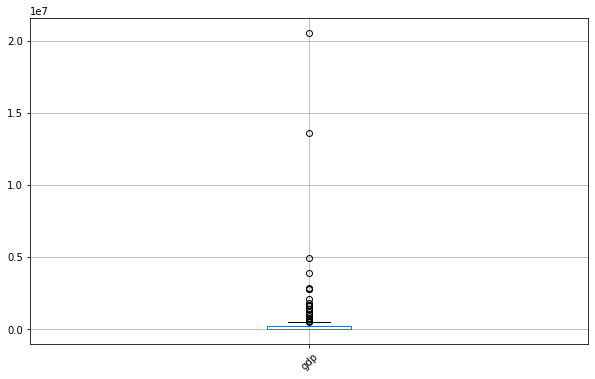

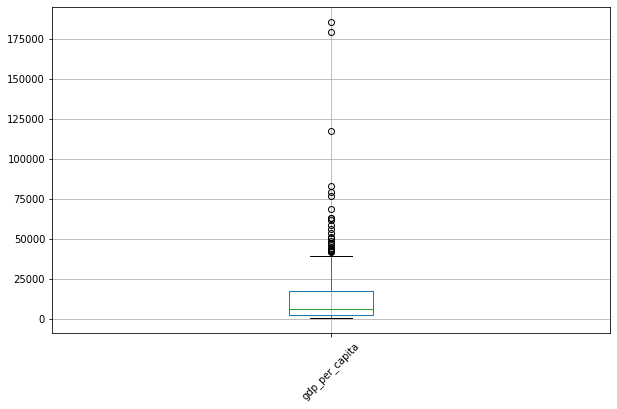

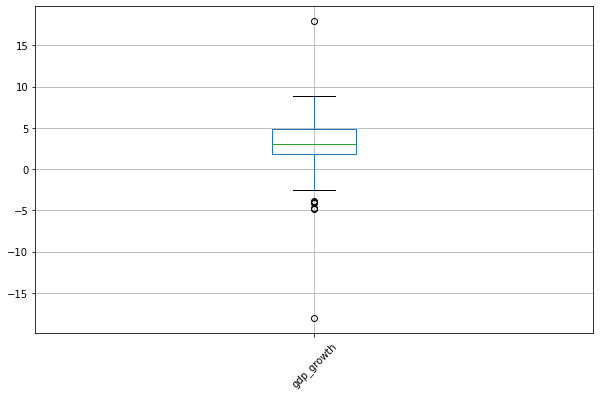

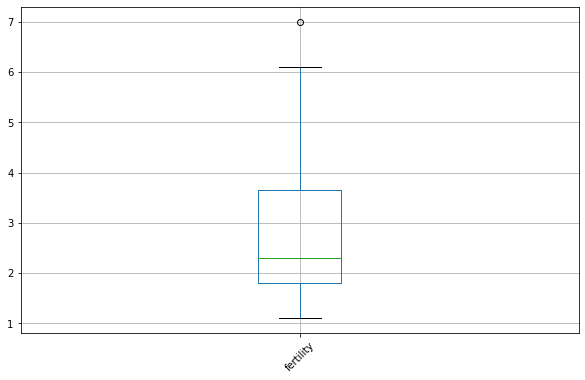

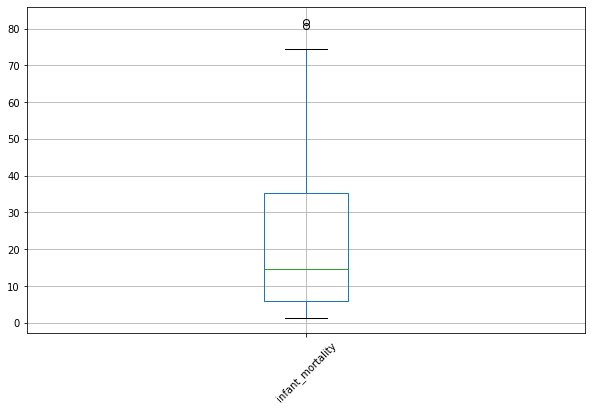

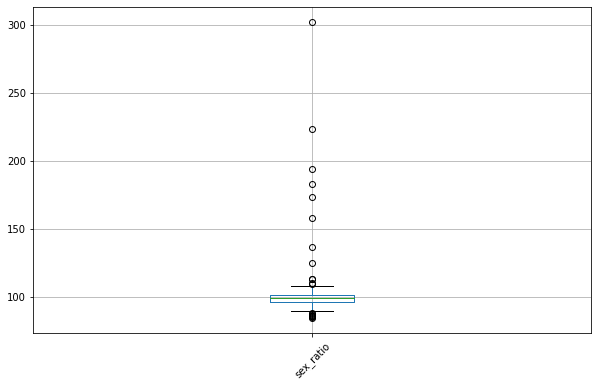

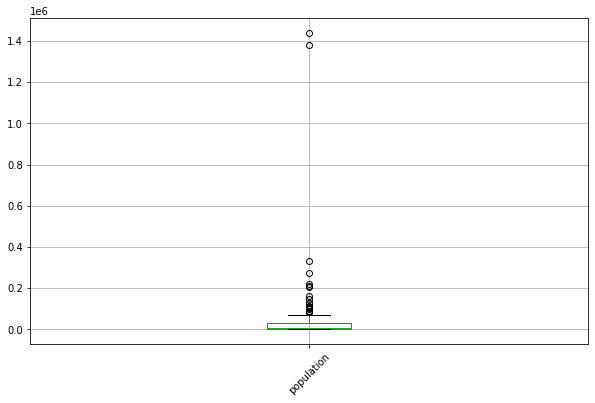

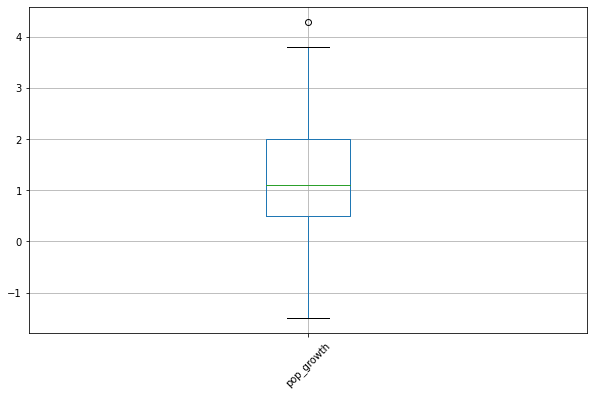

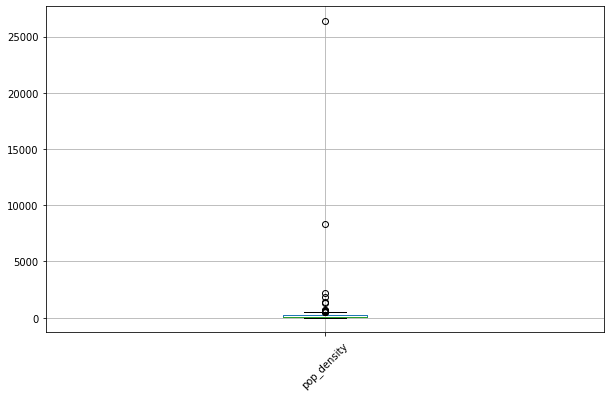

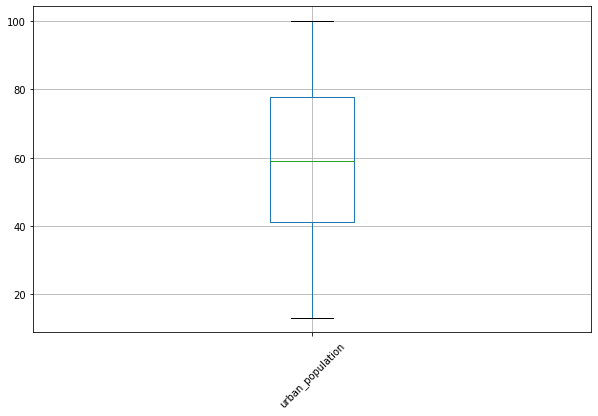

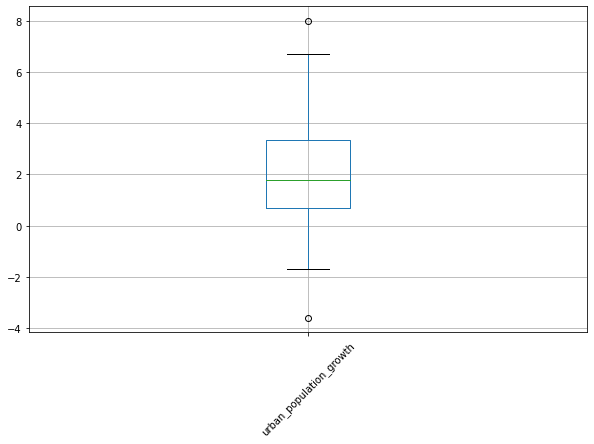

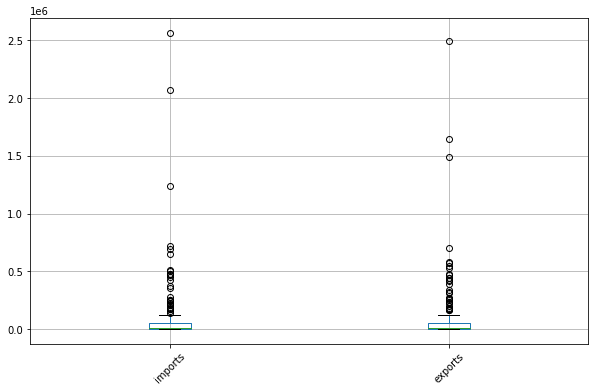

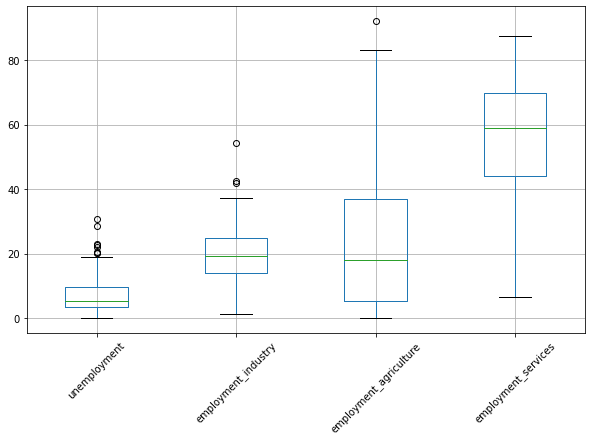

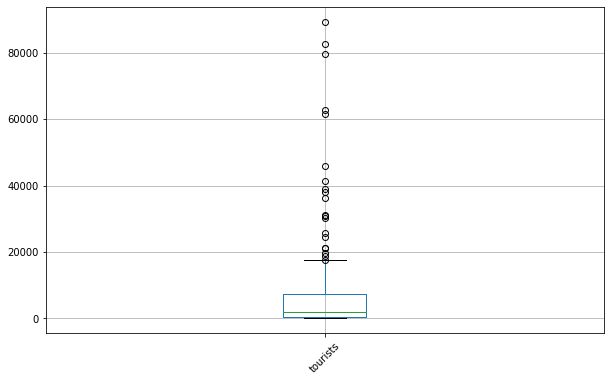

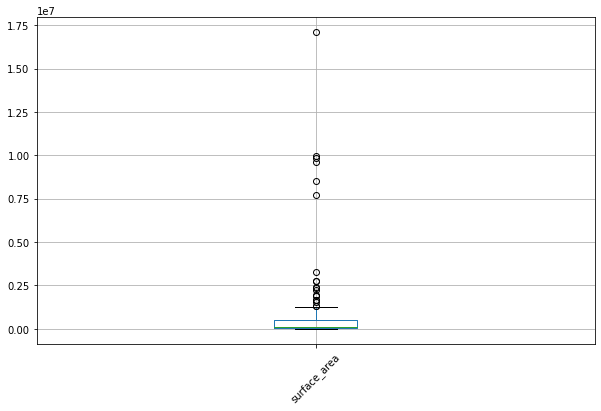

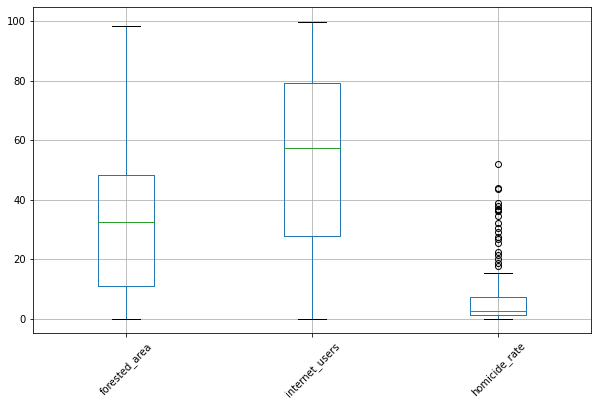

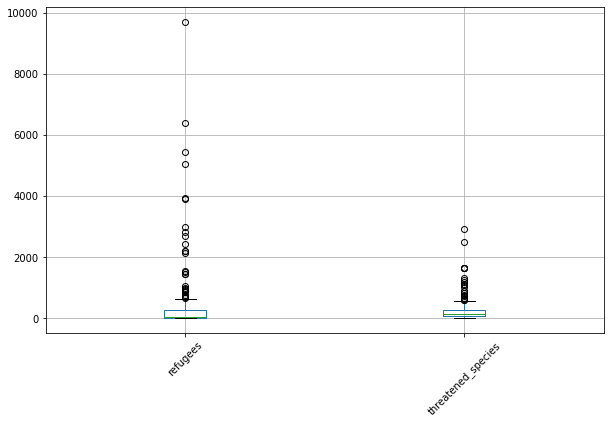

In [29]:
# since having box plots for all the columns together is not visibly viable, 
# i am breaking that into sets of 4 or 5 columns

col_sets = [['gdp'], ['gdp_per_capita'], ['gdp_growth'],
            [ 'fertility'],['infant_mortality'], ['sex_ratio'],
            ['population'], 
            ['pop_growth'], ['pop_density'],
            ['urban_population'], ['urban_population_growth'],
            ['imports', 'exports'], ['unemployment','employment_industry', 'employment_agriculture', 'employment_services'],
            ['tourists'], ['surface_area'], ['forested_area', 'internet_users','homicide_rate'], 
            ['refugees', 'threatened_species'],    
           ]

for cols in col_sets:
    plt.figure(figsize=(10,6))
    data[cols].boxplot()
    #plt.title()
    plt.xticks(rotation = 45)
    plt.show()

Text(0, 0.5, 'Surface Area')

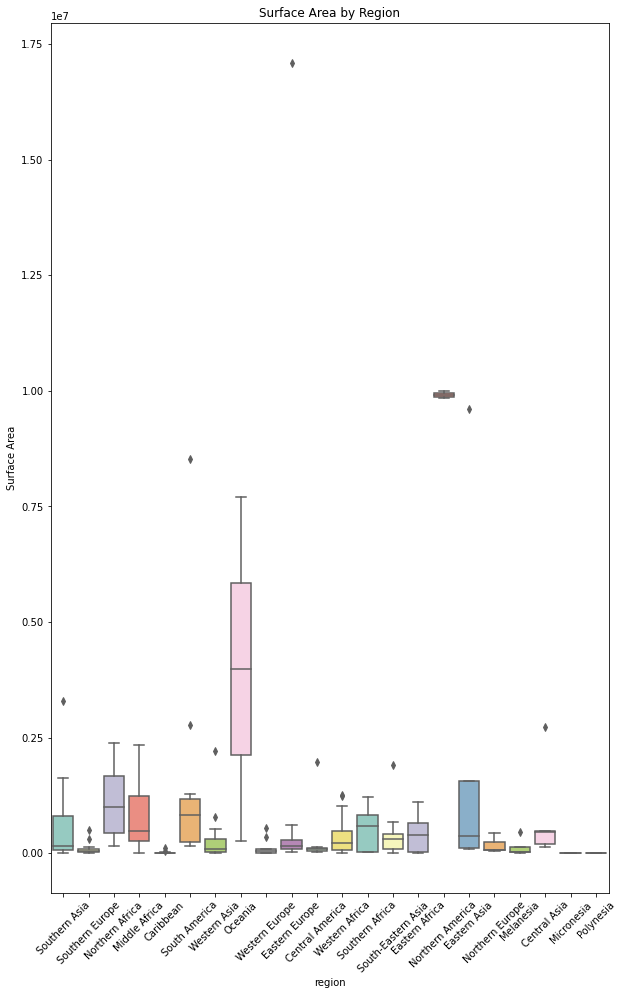

In [30]:
plt.figure(figsize=(10, 16))
plt.title('Surface Area by Region')
sns.boxplot(data = data, x='region', y='surface_area', palette='Set3')
plt.xticks(rotation=45)
plt.ylabel('Surface Area')

**A lot of the columns tend to have outliers in large numbers but the outliers dio hold information for countries ranging in all sorts of ways. I believe these values cannot be removed/deleted as they hold important information, and are not mistakes.**

In [499]:
# Trying to see if there is a corelation between threatened species and GDP

cor_male = data['threatened_species'].corr(data['life_expectancy_male'])
print(cor_male)

0.05678107894509796


In [500]:
cor_female = data['threatened_species'].corr(data['life_expectancy_female'])
print(cor_female)

0.05275195968590835


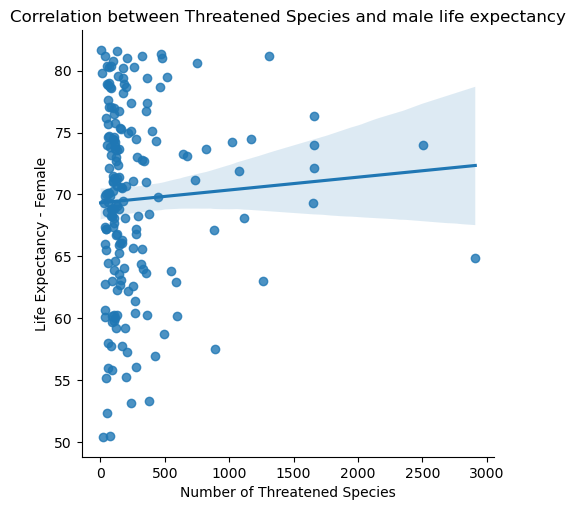

In [501]:
sns.lmplot(x='threatened_species', y='life_expectancy_male', data=data)
plt.title('Correlation between Threatened Species and male life expectancy')
plt.xlabel('Number of Threatened Species')
plt.ylabel('Life Expectancy - Female')
plt.show()

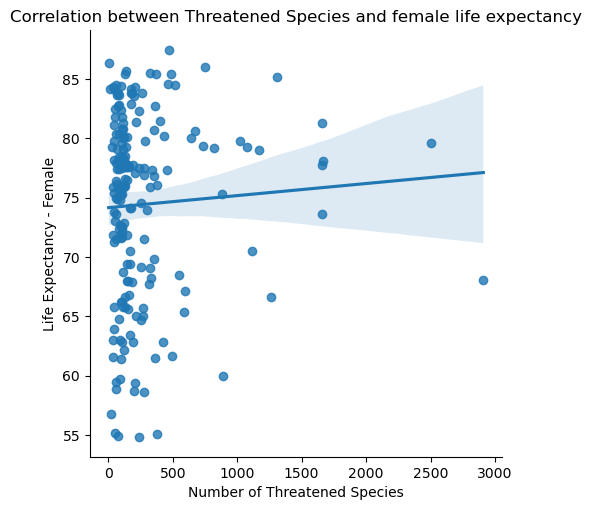

In [502]:
sns.lmplot(x='threatened_species', y='life_expectancy_female', data=data)
plt.title('Correlation between Threatened Species and female life expectancy')
plt.xlabel('Number of Threatened Species')
plt.ylabel('Life Expectancy - Female')
plt.show()

In [ ]:
# there seem to be some columns with a very little correlation, so maybe we can drop them ?